# **SVM**

## *Data Import*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("pickle.csv")

## *About Data*

In [4]:
df.head()

,Pickle,Lemon,Vinegar
0,1,14.541182,9.171020
1,1,15.066288,7.708681
2,1,12.784097,9.935294
3,1,11.746347,9.769397
4,0,5.807864,14.875203


In [5]:
df.describe()

,Pickle,Lemon,Vinegar
count,400.000000,400.000000,400.000000
mean,0.500000,11.164130,12.456428
std,0.500626,5.231158,4.203432
min,0.000000,0.620743,2.989299
25%,0.000000,6.262639,8.634345
50%,0.500000,10.711047,12.550953
75%,1.000000,15.995800,16.171148
max,1.000000,20.786109,20.947857


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Pickle   400 non-null    int64  
 1   Lemon    400 non-null    float64
 2   Vinegar  400 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


## *Visualization*

<Axes: xlabel='Lemon', ylabel='Vinegar'>

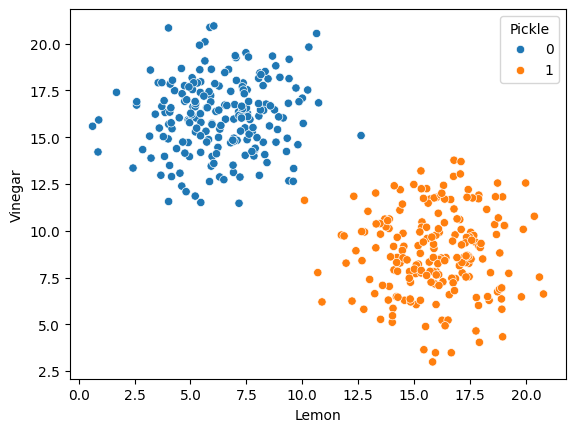

In [7]:
sns.scatterplot(x= "Lemon", data= df, y= "Vinegar", hue= "Pickle")

## *SVM Model*

In [8]:
X = df.drop("Pickle", axis= 1)
y = df["Pickle"]

In [9]:
from sklearn.svm import SVC
from svm_margin_plot import plot_svm_boundary

### **Linear Model**

In [10]:
svc_model = SVC(kernel= "linear")

In [11]:
svc_model.fit(X, y)

SVC(kernel='linear')

 **C = 1 (Default)**

In [12]:
svc_model.C

1.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


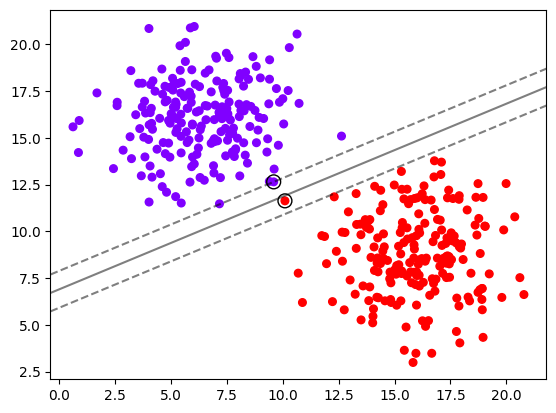

In [13]:
plot_svm_boundary(svc_model, X, y)

 **C = 900**

In [14]:
svc_model = SVC(kernel= "linear", C= 900)
svc_model.fit(X, y)
svc_model.C

900

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


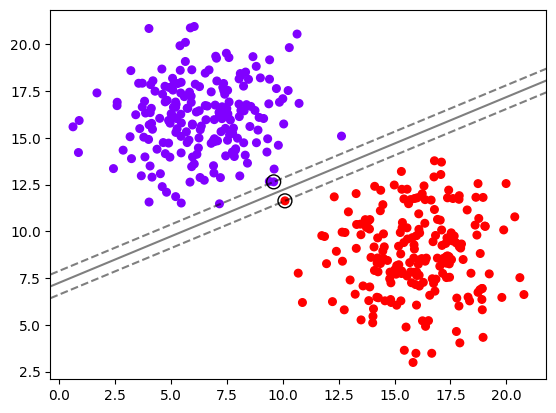

In [15]:
plot_svm_boundary(svc_model, X, y)

 **C = 0.01**

In [16]:
svc_model = SVC(kernel= "linear", C= 0.01)
svc_model.fit(X, y)
svc_model.C

0.01

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


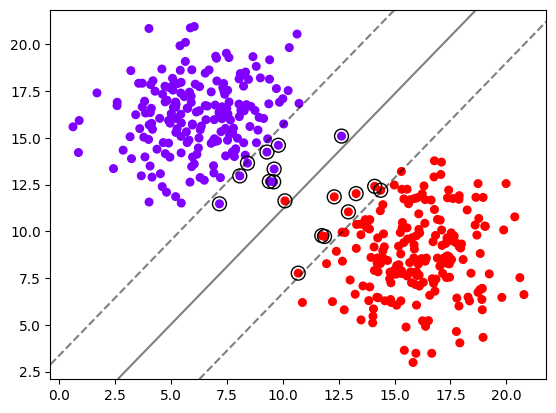

In [17]:
plot_svm_boundary(svc_model, X, y)

 **kernel = "rbf"**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


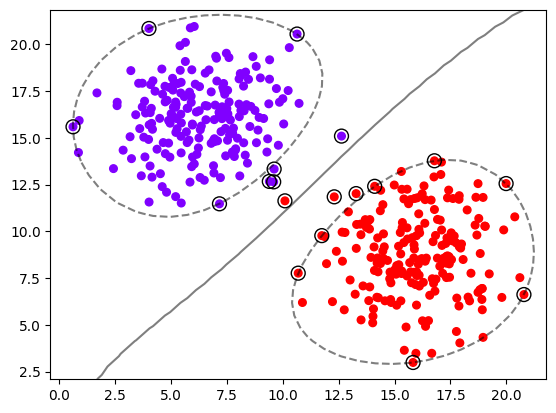

In [18]:
svc_model = SVC(kernel= "rbf")
svc_model.fit(X, y)
svc_model.C

plot_svm_boundary(svc_model, X, y)

 **kernel = "sigmoid"**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


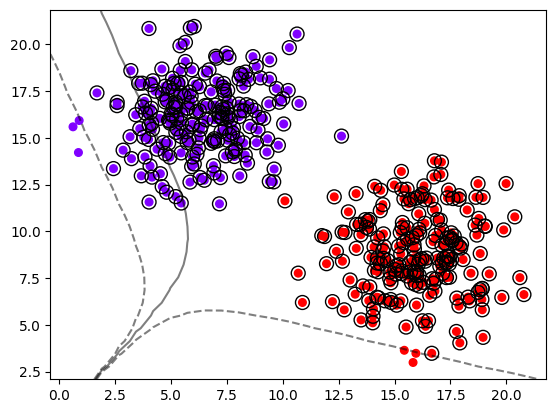

In [19]:
svc_model = SVC(kernel= "sigmoid")
svc_model.fit(X, y)
svc_model.C

plot_svm_boundary(svc_model, X, y)

 **kernel = "poly", degree = 2**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


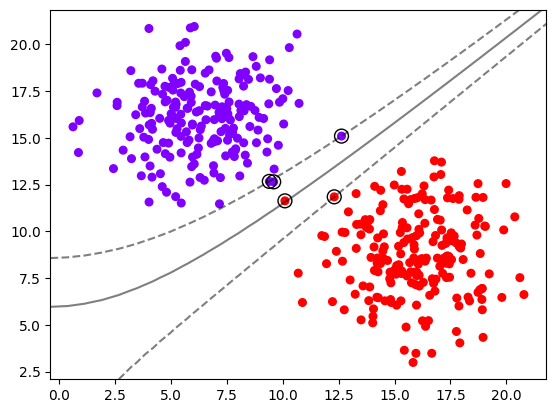

In [33]:
svc_model = SVC(kernel= "poly", degree= 2)
svc_model.fit(X, y)
svc_model.C

plot_svm_boundary(svc_model, X, y)

 **gamma = 0.004**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


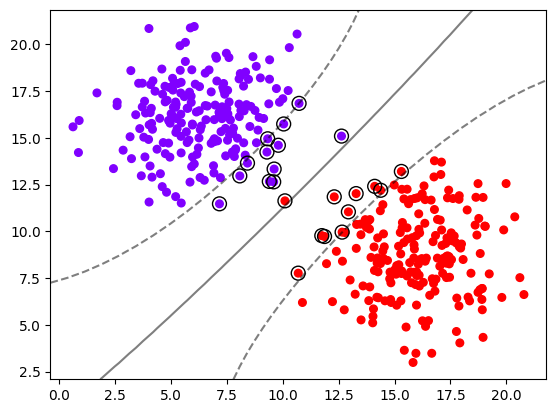

In [27]:
svc_model = SVC(kernel= "rbf", gamma= 0.004)
svc_model.fit(X, y)
svc_model.C

plot_svm_boundary(svc_model, X, y)

 **gamma = 0.4**

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


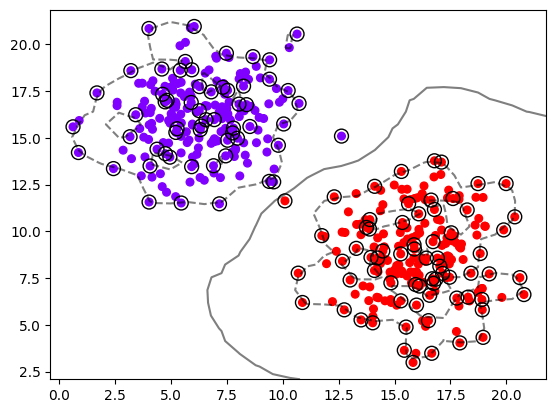

In [28]:
svc_model = SVC(kernel= "rbf", gamma= 0.4)
svc_model.fit(X, y)
svc_model.C

plot_svm_boundary(svc_model, X, y)

## *Grid Search*

In [34]:
from sklearn.model_selection import GridSearchCV

svm = SVC()
C = 10.0 ** np.arange(-4, 3)

parameters = {
    "C" : C,
    "kernel" : ["rbf", "linear"]
}

grid = GridSearchCV(svm, parameters)

In [35]:
grid.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'kernel': ['rbf', 'linear']})

In [37]:
1 - grid.best_score_

0.0025000000000000577